<a href="https://colab.research.google.com/github/aayu5hgit/ApproLoan/blob/main/ApproLoan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
import pickle

In [2]:
warnings.filterwarnings("ignore")

In [15]:
data = pd.read_csv('/content/test_Y3wMUE5_7gLdaTN.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [16]:
df = pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Text(0.5, 1.0, 'Loan Approval Bar (Test Data)')

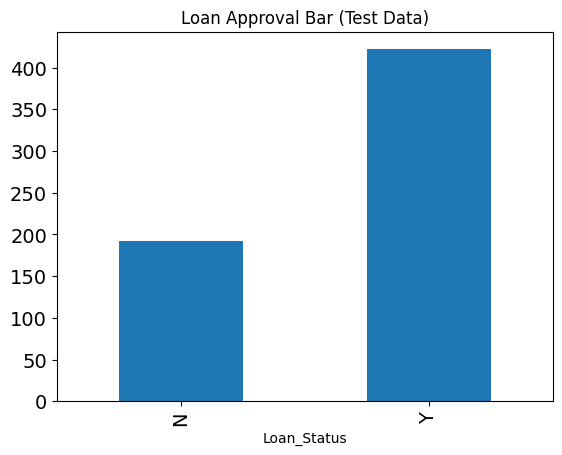

In [24]:
import matplotlib.pyplot as plt
df.groupby(['Loan_Status']).size().plot(kind="bar",fontsize=14)
plt.title('Loan Approval Bar (Test Data)')

In [4]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Credit_History'] = data['Credit_History'].fillna(
    data['Credit_History'].median())

In [5]:
df.dropna(inplace=True)
df['Loan_Status'].replace('N', 0, inplace=True)
df['Loan_Status'].replace('Y', 1, inplace=True)
df2 = df.drop(labels=['ApplicantIncome'], axis=1)
df2 = df2.drop(labels=['CoapplicantIncome'], axis=1)
df2 = df2.drop(labels=['LoanAmount'], axis=1)
df2 = df2.drop(labels=['Loan_Amount_Term'], axis=1)
df2 = df2.drop(labels=['Loan_ID'], axis=1)

In [10]:
le = LabelEncoder()
ohe = OneHotEncoder()

In [40]:
df2 = pd.get_dummies(df2)

X = df2.drop('Loan_Status', 1)
Y = df2['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=6)

log = LogisticRegression()
log.fit(x_train, y_train)

x1 = log.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, x1))
print(x_train)

Accuracy:  0.8333333333333334
     Credit_History  Property_Area  Gender_Male  Married_Yes
84              1.0              2            1            1
59              1.0              2            1            1
455             1.0              1            1            1
21              1.0              2            1            1
199             1.0              2            1            0
..              ...            ...          ...          ...
141             1.0              2            1            0
599             1.0              2            1            1
287             1.0              0            1            1
256             0.0              0            1            0
505             1.0              0            1            1

[384 rows x 4 columns]
